(sec:LinearRegressionML)=
# Machine Learning: First Examples

In this section we consider two simple, but powerful, machine learning approaches: the $k$-nearest neighbor algorithm and the linear model (already encountered in the first part on scientific inference). 

We will first consider the regression problem using the linear model, which by now should be a rather familiar task. However, we will dress it in the machine learning language.

Then we will consider a simple binary classification problem with two predictor variables. The linear model makes strong assumptions concerning structure and thereby yields stable but possibly inaccurate predictions. The method of $k$ nearest neighbors makes very mild structural assumptions which yields predictions that are often accurate but the results are unstable and strongly dependent on the training data. 

## Linear regression 

Regression modeling deals with the description of a **response** variable(s) $\outputs$ and how it varies as function of some **predictor** variable(s) $\inputs$. In machine learning the predictor variables are often known as *features*.

Here we will consider the special case in which there is a single response variable but several features. 

When performing a regression analysis we will have access to a set of training data $\trainingdata$ that consists of:

* $N$ cases, indexed by $i = 1, 2, \dots, N$ 

For each case there is a
* response variable $\output_i$ (observation);
* vector of features $\inputs_i$ (input).

Features
: The key to a successful linear regression analysis is to identify the most relevant features. In physics, these would correspond to a set of basis functions. It is common to include a bias term as a feature, that is we might start the feature indexing at zero and assign $x_0=1$. 

Assume that there are $p$ features, including the bias. We will use the (possibly confusing) notation

* $\inputs_i=[x_{0,i}, x_{1,i}, \dots, x_{p-1,i}]$, with $x_{0,i} = 1 \, \forall i$.

Following [](sec:LinearModels) we will apply the linear machine learning model

\begin{equation}
\MLmodel{\weights \, ; \, \inputs_i} = \inputs_i \cdot \weights,
\end{equation}

where $\weights$ is a $p \times 1$ column vector of model parameters. These are known as weights in this context. We might also simplify the notation and write $\MLoutput_i = \MLmodel{\inputs_i}$. 

A machine learning regression analysis aims at finding the model parameters $\weights$ such that a selected cost function is minimized. This optimization step  is the learning part of the model. The cost function is supposed to measure the performance of the model

The $p$ features for the $N$ cases in the training data set are collected in the $N \times p$ design matrix $\mathbf{X}$ such that we get the simple matrix form

\begin{equation}
\MLoutputs = \mathbf{X} \weights
\end{equation}

The most common metric to quantify the performance of the model is the mean-squared error (MSE)

$$
\mathrm{MSE}(\weights) = \frac{1}{N}\sum_{i=1}^{N}\left(\output_i-\MLoutput_i\right)^2.
$$ (eq:MLExamples:MSE)

Using this metric as a cost function, $C(\weights)$, and using the more compact matrix-vector notation we have

$$
C(\weights)=\frac{1}{N} \left(\outputs-\boldsymbol{X}\weights\right)^T\left(\outputs-\boldsymbol{X}\weights\right).
$$ (eq:MLExamples:MSE-cost)

In general, the minimization of the cost function is an optimization problem that must be approached with numerical techniques such as *gradient descent*. For linear regression, however, the learning can be achieved analytically. The minimum of Eq. {eq}`eq:MLExamples:MSE-cost` is found by solving the normal equation, and if $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we have the optimal model parameters

\begin{equation}
\weights^* = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\outputs.
\end{equation}


### Training scores

The mean-squared error {eq}`eq:MLExamples:MSE` is just one possible choice for the cost function. In general, such metrics are also known as **training scores**. 

Other choices are the **mean absolute error** (MAE), defined as

\begin{equation}
\mathrm{MAE}(\weights) = \frac{1}{N} \sum_{i=1}^N \left| \output_{i} - \MLoutput_i \right|,
\end{equation}

and the $R2$ score, also known as *coefficient of determination* 

\begin{equation}
\mathrm{R2}(\weights) = 1 - \frac{\sum_{i=1}^N \left( \output_{i} - \MLoutput_{i} \right)^2}{\sum_{i=1}^N \left( \output_{i} - \bar{y} \right)^2},
\end{equation}

where $\bar{y} = \frac{1}{N} \sum_{i=1}^N \MLoutput_{i}$ is the mean of the model predictions.

For classification tasks one might also use the misclassification cost function (see {numref}`exercise:MLexamples:misclassification-cost-function`) or cross entropy. Misclassification is the relative number of misclassified instances in a data set and is therefore the same as $1-\alpha$, where $\alpha$ is the accuracy.

````{prf:example} Binary classification
:label: example:MLexamples:binary-classification

Figure {numref}`fig-example-MLexamples-binary_classification_data` shows a scatterplot of training data that is a function of two predictor variables $\inputs_i = (x_1, x_2)_i$. The output $y$ is a class that can be either Blue or Red. 

The procedure and code that generate this data is included in the hidden code cell below. However, here we assume that we don't know the underlying data generating process. Our aim is to construct machine learning algorithms that can be trained on the collected data and make predictions for future data. The task can then be expressed as: Develop a computer program that can learn from labeled data $\trainingdata = \{ \inputs_i, \output_i\}_{i=1}^N$ and make a prediction of the class $\testoutput$ that a new input $\testinputs$ belongs to.

````

```{glue:figure} binary_classification_data_fig
:name: fig-example-MLexamples-binary_classification_data

Labeled training data for a binary classification problem.
```

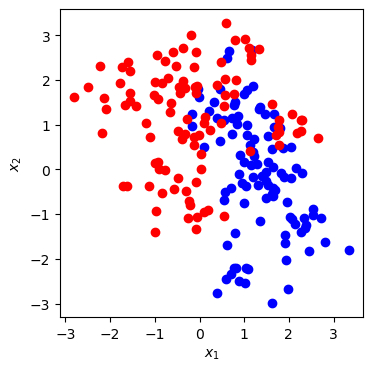

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from myst_nb import glue

# Generate training data
np.random.seed(seed=2022)
# Step 1
# - Blue data: generate 10 means mb_k from N([1,0],I)
# - Red data:  generate 10 means mr_k from N([0,1],I)
# Step 2
# - for each class:
#   - for observation in range(100):
#     - pick a mean, m_k, from the above list randomly (p=1/10)
#     - generate a data point from N(m_k,I/5)
num_means = 10
classes=['blue','red'] # blue label is 0, red label is 1
root_means = [[1,0],[0,1]]
num_data_per_class = 100
width = 0.2
# Step 1
class_means = []
for iclass, root_mean in enumerate(root_means):
    class_mean_list = []
    for iclass_mean in range(num_means):
        mean_k = stats.multivariate_normal(mean=root_mean,cov=1).rvs()
        class_mean_list.append(mean_k)
    class_means.append(class_mean_list)
# Step 2
def generate_binaryclass_data(num_data_per_class):
    data = np.zeros((2*num_data_per_class,3))
    for iclass, class_i in enumerate(classes):
        for idata in range(num_data_per_class):
            # label the data
            data[iclass*num_data_per_class+idata,2] = iclass
            # populate the input
            mean_k = class_means[iclass][np.random.choice(np.arange(10))]
            xdata = stats.multivariate_normal(mean=mean_k,cov=width).rvs()
            data[iclass*num_data_per_class+idata,0:2] = xdata
    return data

train_data = generate_binaryclass_data(num_data_per_class)
# Shuffle the data
np.random.shuffle(train_data)


fig_train_data,ax = plt.subplots(1,1, figsize=(4,4))
for iclass, color in enumerate(classes):
    x_data = train_data[train_data[:,2]==iclass,:2]
    ax.scatter(x_data[:,0],x_data[:,1],color=color)
ax.set_aspect('equal', 'box')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
glue("binary_classification_data_fig", fig_train_data, display=False);

## Linear classification

Let's consider an application of the linear model for the binary classification task of {prf:ref}`example:MLexamples:binary-classification`. We label these classes as 0 for Blue and 1 for Red such that $y_i \in \{0,1\}$. Let us first introduce a linear model whose output we label as $z$

$$
\boldsymbol{z} = \boldsymbol{X} \weights.
$$

We again include a bias feature in the design matrix $\boldsymbol{X}$ such that $\weights = [\weight_0, \weight_1, \weight_2]^T$. We note that each model output $z$ is a continuous variable. How could this be used for the task of a binary classifier?

```{glue:figure} fig_linear_classifier_plane
:name: "fig:MLexamples:fig_linear_classifier_plane"

This plane is the linear regression (ordinary least squares) fit of a model $z = \weight_0 + \weight_1 \inputt_1 + \weight_2 \inputt_2$ to the training data of {numref}`fig-example-MLexamples-binary_classification_data`. For visualization we indicate the line where it crosses the $z=0$ plane and use red (blue) color to emphasize regions with positive (negative) $z$-value.
```


### The perceptron classifier

We can achieve a mapping from the continuous output $z$ of the linear regressor to a discrete one $\MLoutput \in \{ 0, 1 \}$ using the *perceptron* model which is usually formulated using the sign function as

\begin{equation}
\MLoutput = \frac{\mathrm{sign}(z)+1}{2}.
\end{equation}

A binary classifier, providing a discrete output, can then be obtained accoring to the simple rule

$$
\MLoutput = \MLoutput(z) = \left\{ 
\begin{array}{ll}
\mathrm{Red} & \text{if } z > 0 \\
\mathrm{Blue} & \text{if } z < 0. \\
\end{array}
\right.
$$

The two predicted classes will be separated by a *decision boundary* $\left\{ \inputs \, : \, \inputs \weights^* = 0 \right\}$. This boundary becomes a straight line in this case.


### The soft classifier

In many cases, it is more favorable to have a "soft" classifier that outputs a probability for an output to belong to a given category rather than providing a hard decision. Logistic regression is the most common example of such a soft classifier. In logistic
regression, the probability that input $\inputs$ belongs to the class $c=1$ is given by the so-called *logit* function (an example of a S-shape or *Sigmoid* function) , 

$$
\MLoutput(z) = \prob(\output(\inputs)=1) = \frac{1}{1+e^{-z}} = \frac{e^z}{1+e^z},
$$ (eq:MLexamples:sigmoid)

where the so called *activation* $z = \inputs \cdot \weights$. 

* Note that $1-\MLoutput(z)= \MLoutput(-z)$.
* The sigmoid function can be motivated in several different ways. E.g. in information theory this function represents the probability of a signal $s=1$ rather than $s=0$ when transmission occurs over a noisy channel.

```{glue:figure} fig_linear_classifier
:name: "fig:MLexamples:fig_linear_classifier"

Results of the hard (perceptron) and soft (sigmoid) linear classifier on the data from {prf:ref}`example:MLexamples:binary-classification`. The model predictions for the hard classifier are represented by the red and blue regions on either side of the sharp decision boundary (left panel). For the soft classifier (right panel) the colors represent the model prediction for the probability of belonging to the red class. The black line marks the decision boundary where the model gives no preference for either class $\prob(\MLtestoutput=\text{Red}) = 0.5$. See also {numref}`fig:MLexamples:fig_linear_classifier_plane` for the corresponding activation $z$ from the linear regression model.
```


## $k$ nearest neighbors classification

Nearest-neighbor methods use the closest observations in the training data $\trainingdata$ to make a prediction. Usually, the definition of "closest" is usually the Euclidean distance in the input space, i.e., the length $\left| \testinputs - \inputs_i \right|$. Specifically, the $k$ nearest neighbor prediction for a target would be given by the average

\begin{equation}
\tilde\output(\testinputs) = \frac{1}{k} \sum_{\inputs_i \in N_k(\testinputs)} \output_i,
\end{equation}

where $ N_k(\testinputs)$ is the neighborhood of $\testinputs$ defined by the $k$ nearest points $\testinputs_i$ in the training data set. Forced to make a hard decision we would use the majority vote and assign $\MLtestoutput = 1$ if $\tilde\output(\testinputs) > 0.5$, and $\MLtestoutput = 0$ if $\tilde\output(\testinputs) \leq 0.5$.

As shown in Fig. {numref}`fig:MLexamples:fig_kNN_classifier` there are much fewer misclassifications in the training data set when using the $k$ nearest neighbor method, than when using the linear classifier. However, one should also note that none(!) of the training data will be misclassified when using $k=1$, while the number will be an increasing function of $k$. Is it always best to use $k=1$ nearest neighbors? No, that cannot be. One realizes that the decision boundaries will vary greatly when using a different training set, giving very different predictions for a validation set of data. This is an example of overfitting, but this time in the context of a classification problem.

```{glue:figure} fig_kNN_classifier
:name: "fig:MLexamples:fig_kNN_classifier"

Results of $k$NN classifier, with $k=1,5,15$, on the data from {prf:ref}`example:MLexamples:binary-classification`. With $k=1$ we will trivially reproduce all training data, but the model will be heavily overfitted to the actual set of training data. The $k=15$ model will misclassify some of the training data but will (probably) generalize better when classifying new data.
```

```{admonition} Data normalization
The $k$-nearest neighbor classifier is an example of a method for which it becomes very important to normalize the input data. Imagine that one of the two inputs, $x_1$, varies in a range $[100,1000]$ whereas the other one, $x_2$, is limited to $[0,1]$. It is then obvious that the Euclidean distance will be dominated by the distance in $x_1$ and our model will be almost insensitive to $x_2$.

We can solve this by normalizing the input parameters by some transformation and scaling. For example, we could consider instead $(\tilde{x}_1, x_2)$, where $\tilde{x}_1 \equiv \frac{x_1 - 100}{1000}$. Now both parameters will be in the $[0,1]$ range and the method will work much better.

Another common normalization scheme is known as standardization

\begin{equation}
\tilde{x}_i = \frac{x_i - \bar{x}_i}{\sigma_i},
\end{equation}

where $\bar{x}_i$ and $\sigma_i$ is the mean and the variance, respectively, for each input variable evaluated over the training datat set.

Data normalization is a common procedure before any machine learning task. In fact, it is common to also normalize the output. However, remember that:

- Use only the training data for normalization. You will build a bias into the training procedure if you also include validation or test data into the computation of, e.g., the data mean and standard deviation.
- Apply the same normalization on any new data (including validation data).
- Don't forget to transform back before presenting results.
```

## Code examples: binary classifiers

### Data normalization

In [2]:
def standardize_data(train_data,verbose=False):
    "Standardize data to mean zero and std=1."
    sample_mean=train_data.mean(axis=0)
    sample_std=train_data.std(axis=0)
    if verbose:
        print('mean (before standardization) = ',sample_mean)
        print(' std (before standardization) = ',sample_std)
    return (train_data - sample_mean) / sample_std, sample_mean, sample_std
    
# Apply to our training data set
std_train_data, sample_mean, sample_std = standardize_data(train_data,verbose=True)

mean (before standardization) =  [0.56877654 0.49681303 0.5       ]
 std (before standardization) =  [1.21440984 1.39206493 0.5       ]


Note in particular that we normalize both input and output. This implies that the transformed data $(\tilde{\inputs},\tilde{\outputs})$ has mean zero and variance one, and consequently that $\tilde{\output}_i \in \{-1,1\}$.

### Linear classifier(s)

Create and fit the linear model.

In [3]:
# Set up design matrix
# correct shape, column 0 will be the bias feature
X = np.ones((len(std_train_data),3))
# column 1 corresponds to x1
X[:,1] = std_train_data[:,0]
# column 2 corresponds to x2
X[:,2] = std_train_data[:,1]

# Targets (responses)
y = std_train_data[:,2]

#ols estimator for model parameter theta
ols_cov   = np.linalg.inv(np.matmul(X.T,X))
ols_xTd   = np.matmul(X.T,y)
ols_theta = np.matmul(ols_cov,ols_xTd)

print(f'theta_ols \t{ols_theta}')

theta_ols 	[-5.33776818e-18 -5.06798079e-01  2.67244070e-01]


Make predictions using both hard and soft classifiers on a grid. Note how we use the standardized data for model training (above) and predictions (below), while we transform the input coordinates back to the original scale for the plot.

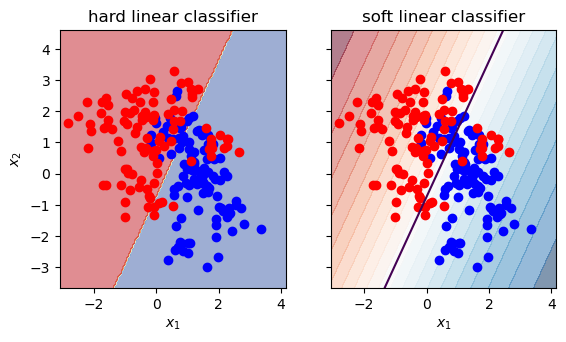

In [4]:
# Grid for predictions
x1, x2 = np.mgrid[-3:3:.05, -3:3:.05]
x1x2_grid = np.dstack((x1, x2))

# predictions of the linear classifier on the grid
# liner model output
z_grid = ols_theta[0] + ols_theta[1]*x1x2_grid[:,:,0] + ols_theta[2]*x1x2_grid[:,:,1]
# perceptron (hard classifier) prediction
yhat_hard_grid = np.sign(z_grid)
# sigmoid (soft classifier) prediction
yhat_soft_grid = 1/(1+np.exp(-z_grid))

# Final results are transformed back to original coordinates
x1_orig = sample_std[0]*x1 + sample_mean[0]
x2_orig = sample_std[1]*x2 + sample_mean[1]

fig_linear_classifier,axs = plt.subplots(1,2,sharey=True)

ax=axs[0]
ax.set_ylabel(r'$x_2$')
im = ax.contourf(x1_orig, x2_orig, yhat_hard_grid,cmap=plt.cm.RdYlBu_r,alpha=0.5);
ax.set_aspect('equal', 'box')
ax.set_title('hard linear classifier')

ax=axs[1]
im = ax.contourf(x1_orig, x2_orig, yhat_soft_grid,levels=20,cmap=plt.cm.RdBu_r,alpha=0.5, vmin=0.0, vmax=1.0, extend='both');
ax.contour(x1_orig, x2_orig, yhat_soft_grid,levels=[0.5])

for iclass, color in enumerate(classes):
    x_data = train_data[train_data[:,2]==iclass,:2]
    for ax in axs[:2]:
        ax.set_xlabel(r'$x_1$')
        ax.scatter(x_data[:,0],x_data[:,1],color=color)
ax.set_aspect('equal', 'box')
ax.set_title('soft linear classifier');

glue("fig_linear_classifier", fig_linear_classifier, display=False);

For visualization we also make a 3D plot of the surface $z=z(x_1,x_2) = w_0 + w_1 x_1 + w_2 x_2$ that results from the linear regression. This is the plane that minimizes the sum of squared distances to the data.

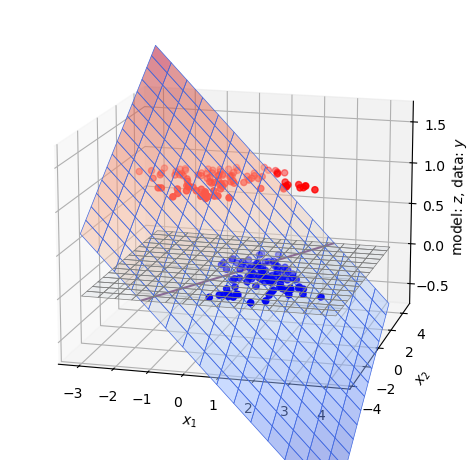

In [5]:
from mpl_toolkits.mplot3d import axes3d

fig_linear_classifier_plane = plt.figure()
ax = fig_linear_classifier_plane.add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(x1_orig, x2_orig, z_grid, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.5, cmap=plt.cm.coolwarm)

# Plot the x1x2 surface
ax.plot_surface(x1_orig, x2_orig, np.zeros_like(x1_orig), edgecolor='grey', lw=0.5, rstride=8, cstride=8, alpha=0.05)

for iclass, color in enumerate(classes):
    x_data = train_data[train_data[:,2]==iclass,:2]
    ax.scatter(x_data[:,0],x_data[:,1], zs=iclass, zdir='z',color=color)

ax.contour(x1_orig, x2_orig, z_grid,levels=[0.0],)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'model: $z$, data: $y$')

ax.set_zlim(-0.75, 1.75)

ax.view_init(elev=15., azim=-75, roll=0)
fig_linear_classifier_plane.tight_layout()
glue("fig_linear_classifier_plane", fig_linear_classifier_plane, display=False);

### $k$NN classifier

In [6]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(pos1, pos2):
    return np.linalg.norm(pos1-pos2)
    
def knn_classifier(xstar,k=5):
    y_train = std_train_data[:,2]
    # compute distances to all training data
    distances = []
    for x_train in std_train_data[:,:2]:
        distances.append(euclidean_distance(xstar,x_train))
    # sort targets by closest distance
    y_sorted = [y for _, y in sorted(zip(distances, y_train))]
    # majority vote (targets are either +1 or -1)
    try:
        return np.sign(np.sum(y_sorted[:k]))
    except TypeError:
        # allow k to be list-like
        return [np.sign(np.sum(y_sorted[:ki])) for ki in k]

We will explore three different settings with $k=1,5,15$.

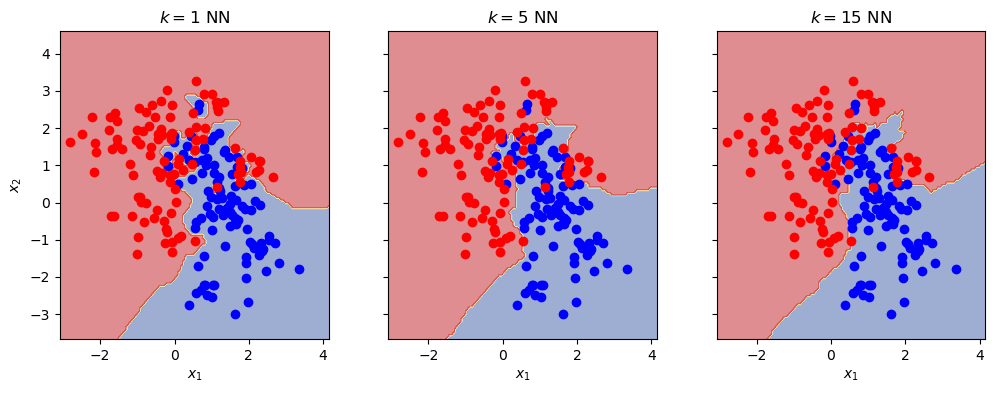

In [7]:
k_list=[1,5,15]
yhat_knn_grid = np.zeros((len(x1),len(x2),len(k_list)))
for ix1 in range(x1x2_grid.shape[0]):
    for ix2 in range(x1x2_grid.shape[1]):
        yhat_knn_grid[ix1,ix2,:] = np.array(knn_classifier(x1x2_grid[ix1,ix2,:],k=k_list))

fig_kNN_classifier,axs = plt.subplots(1,len(k_list),figsize=(12,4),sharey=True)
axs[0].set_ylabel(r'$x_2$')
for ik,k in enumerate(k_list):
    ax=axs[ik]
    ax.set_xlabel(r'$x_1$')
    im = ax.contourf(x1_orig, x2_orig,\
    	yhat_knn_grid[:,:,ik],cmap=plt.cm.RdYlBu_r,alpha=0.5);
    for iclass, color in enumerate(classes):
        x_data = train_data[train_data[:,2]==iclass,:2]
        ax.scatter(x_data[:,0],x_data[:,1],color=color)
    ax.set_aspect('equal', 'box')
    ax.set_title(rf'$k={k}$ NN')

glue("fig_kNN_classifier", fig_kNN_classifier, display=False);

## Exercises

```{exercise} Sigmoid decision boundary
:label: exercise:MLexamples:sigmoid-decision-boundary

Consider the sigmoid classifier {eq}`eq:MLexamples:sigmoid` with the activation determmined by the scalar product of predictor variables and model parameters and the output providing the probability $\prob(\output(\inputs)=1)$.
- Explain why the sigmoid classifier can be considered a non-linear model.
- Explain why the decision boundary of a sigmoid classifier is still a straight line despite the non-linear dependence on the model parameters.
```

```{exercise} Misclassification cost function
:label: exercise:MLexamples:misclassification-cost-function

The perfomance of a hard classifier can be evluated using a misclassification cost function

$$
C(\weights) = \frac{1}{N} \sum_{i=1}^N ( 1 - \delta_{\MLoutput_i,\output_i}),
$$ (eq:MLexamples:misclassification)

where each term evaluates to zero if the classification is correct. 

- What would be different in our training when using such a cost function?
- Do you expect the parameters to be A) the same, B) similar, C) very different compared to the model where the mean-squared error is used to define the cost function?
```

```{exercise} Validation errors
:label: exercise:MLexamples:validation-errors

Generate 2000 validation data with the code used in the binary classification {prf:ref}`example:MLexamples:binary-classification`. Evaluate the misclassification error {eq}`eq:MLexamples:misclassification` for both the training data and this new validation data using:
- The hard linear classifier
- The $k$NN classifier with different $k \in [1,20]$.

Comment on the results.
```

```{exercise} $k$NN for regression
:label: exercise:MLexamples:kNN-regression

How could you use the $k$NN model for a regression problem? In particular, how would you decide the prediction $\MLtestoutput$ for a specific $\testinputs$?
```

```{exercise} $R2$ score
:label: exercise:MLexamples:R2-score

The $R2$ score can be said to describe the fraction of variations in the data that is predictable from the independent variables using the model.

- Try to understand this statement.
- What is the value of the $R2$ score for a perfect model?
- What does it mean when $R2 \to 0$?
```

## Solutions

```{solution} exercise:MLexamples:sigmoid-decision-boundary
:label: solution:MLexamples:sigmoid-decision-boundary
:class: dropdown

The mathematical model for the sigmoid outputs is not linear in the parameters. The decision boundary corresponds to $\MLoutput = 0.5$, which implies $e^{-z} = 1$, or $\inputs \cdot \weights = 0$. This is a straight line.
```

```{solution} exercise:MLexamples:kNN-regression
:label: solution:MLexamples:kNN-regression
:class: dropdown

You could use the same algorithm but your training data would have continuous responses $\output_i$ and the model must give a continuos variable $\MLtestoutput$ as the prediction. One way would be to use the average 

$$
\MLoutput(\testinputs) = \frac{1}{k} \sum_{\inputs_i \in N_k(\testinputs)} \output_i,
$$

```

```{solution} exercise:MLexamples:R2-score
:label: solution:MLexamples:R2-score
:class: dropdown

For a perfect model we would have $\output_i = \MLoutput_i$ for all $i$ and therefore $R2=1$.

A model that simply predicts the mean of the training data, $\MLtestoutput = \bar\output$, would be one that is completely independent of the independent variables. It would also give $R2=0$ when evaluated over to the training data. Negative values for $R2$ would mean that your model is even worse than that simple mean-value model.
```